In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import os 
import scipy.io as sio
def get_data():
    e_faces = np.load('e_faces_set_all_faces.npy')
    mean_face = np.load('mean_face_all_faces.npy')

    data = sio.loadmat('allFaces.mat')
    faces_all = []
    imgs = np.array(data['faces'])
    n = data['n'][0][0]
    m = data['m'][0][0]
    nfaces = np.ndarray.flatten(data['nfaces'])
    i = 0
    for j in range(len(nfaces)):
        user_faces = []
        for k in range(nfaces[j]):
            img = np.array(imgs[:, i + k]).reshape(m, n).T
            user_faces.append(img)
        i += nfaces[j]

        faces_all.append(user_faces)
    
    return e_faces, mean_face, faces_all

def plot_axes(users, axis1, axis2, e_faces, mean_face, faces_all, ax):
    # plt.clf()
    for user in users:
        user_faces = faces_all[user]
        pts = []
        for face in user_faces:
            face_eform = np.matmul(e_faces.T, face.flatten() - mean_face)
            pts.append((face_eform[axis1], face_eform[axis2]))
        ax.plot([pt[0] for pt in pts], [pt[1] for pt in pts], 'o', label='User {}'.format(user))
    ax.set_xlabel('Transformed Axis {} Coefficient'.format(axis1))
    ax.set_ylabel('Transformed Acis {} Coefficient'.format(axis2))
    ax.set_title('Users ({}) Principle Components of {} and {}'.format(users, axis1, axis2))
    ax.legend()
    return ax

def plot_axes_plt(users, axis1, axis2, e_faces, mean_face, faces_all):
    plt.clf()
    plt.figure(figsize=(8, 8))
    for user in users:
        user_faces = faces_all[user]
        pts = []
        for face in user_faces:
            face_eform = np.matmul(e_faces.T, face.flatten() - mean_face)
            pts.append((face_eform[axis1], face_eform[axis2]))
        plt.plot([pt[0] for pt in pts], [pt[1] for pt in pts], 'o', label='User {}'.format(user))
    plt.xlabel('Transformed Axis {} Coefficient'.format(axis1))
    plt.ylabel('Transformed Acis {} Coefficient'.format(axis2))
    plt.title('Users {} Principle Components of {} and {}'.format(users, axis1, axis2))
    plt.legend()

e_faces, mean_face, faces_all = get_data()

# for i in range(100):
#     plt.clf()
#     plt.figure(figsize=(8, 8))
#     ax = plt.subplot(1, 1, 1)
#     plot_axes([4, 5], i, i+1, e_faces, mean_face, faces_all, ax)
#     plt.show()

# fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# axes[0][0] = plot_axes([4, 5], 4, 5, e_faces, mean_face, faces_all, axes[0][0])
# axes[0][1] = plot_axes([4, 5], 5, 6, e_faces, mean_face, faces_all, axes[0][1])
# axes[1][0] = plot_axes([4, 5], 6, 7, e_faces, mean_face, faces_all, axes[1][0])
# axes[1][1] = plot_axes([4, 5], 28, 29, e_faces, mean_face, faces_all, axes[1][1])
# fig.tight_layout()
# plt.show()


# Separating Axis sets:
# Users 4 & 5: (4, 5), (5, 6), (6, 7), (28, 29), (41, 42), 



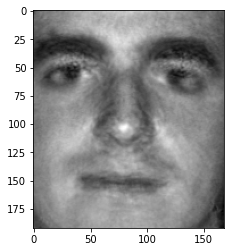

In [4]:
def run_axs_analysis():
    os.mkdir('media/axis_analysis/')
    for user_num in range(len(faces_all)-1):
        os.mkdir('media/axis_analysis/user_{}_and_{}'.format(user_num, user_num + 1))
        print('USERS {} AND {} OUT OF {}...'.format(user_num, user_num + 1, len(faces_all)))
        for i in range(50):
            plt.clf()
            plot_axes_plt([user_num, user_num + 1], i, i+1, e_faces, mean_face, faces_all)
            plt.savefig('media/axis_analysis/user_{}_and_{}/axis_{}_and_{}.jpg'.format(user_num, user_num + 1, i, i+1))
            print('\t\tAXIS {} AND {} OUT OF 50'.format(i, i+1))

def save_user_images(e_faces, mean_face):
    for user_num in range(len(faces_all)-1):
        plt.clf()
        plt.imshow(faces_all[user_num][0], cmap='gray')
        plt.savefig('media/axis_analysis/user_{}_and_{}/user{}.jpg'.format(user_num, user_num + 1, user_num))
        plt.clf()
        fac1 = np.matmul(e_faces.T, faces_all[user_num][0].flatten() - mean_face)
        plt.imshow((np.matmul(e_faces, fac1) + mean_face).reshape(192, 168), cmap='gray')
        plt.savefig('media/axis_analysis/user_{}_and_{}/user{}_eigenform.jpg'.format(user_num, user_num + 1, user_num))
        plt.clf()
        plt.imshow(faces_all[user_num + 1][0], cmap='gray')
        plt.savefig('media/axis_analysis/user_{}_and_{}/user{}.jpg'.format(user_num, user_num + 1, user_num + 1))
        plt.clf()
        fac2 = np.matmul(e_faces.T, faces_all[user_num + 1][0].flatten() - mean_face)
        plt.imshow((np.matmul(e_faces, fac2) + mean_face).reshape(192, 168), cmap='gray')
        plt.savefig('media/axis_analysis/user_{}_and_{}/user{}_eigenform.jpg'.format(user_num, user_num + 1, user_num + 1))
        

save_user_images(e_faces, mean_face)